In [36]:
!pip install --upgrade tensorflow



In [37]:
tf.__version__

'2.9.1'

In [38]:
!pip install tensorflow==2.1

ERROR: Could not find a version that satisfies the requirement tensorflow==2.1 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.10.0rc0)
ERROR: No matching distribution found for tensorflow==2.1


In [39]:
tf.__version__

'2.9.1'

In [40]:
import math

In [41]:
pip install -U scikit-image

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install nvsmi


Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [44]:
from PIL import Image
import os
import PIL
import glob

In [45]:
import skimage.transform
import numpy as np

In [144]:
import os
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow import keras
import h5py
import json
from tensorflow.keras import layers

In [47]:
#nvidia-smi

In [48]:
# def bound_image_dim(image_size 0 None. max_size=None):
#     if (max_size is not  None) and\
#         (min_size is not None) and\
#             (max_size < min_size):
#             raise ValueError('´max_size ´ must be >= ´min_size´')
#             dtype = image.dtype
#             (height,wdth, *_) = image.shape
#             scale = 1
#             if  min_size is not None:
#                 image_min = min(height, width)
#                 scale = max(1,min_size )
                   

In [49]:
# data_dir = '../input/identifying-disease-in-tea-leafs/tea sickness dataset' 
# class_names = os.listdir(data_dir)
# num_class = len(class_names)
# image_files = [[os.path.join(data_dir, class_name, x) 
#                for x in os.listdir(os.path.join(data_dir, class_name))] 
#                for class_name in class_names]

HYPERPARAMETERS

In [50]:
INIT_LR = 1e-3
BATCH_SIZE = 16
EPOCHS = 10
IMAGE_SIZE = 256
default_image_size = tuple((IMAGE_SIZE, IMAGE_SIZE))
image_size = 0
data_dir = "..\\Final_Project\\Tealeaf\\val"
CHANNELS=3
AUTOTUNE = tf.data.AUTOTUNE

# Spliting the Dataset

In this Function is use for Perform the Spliting the images for training the Nerrtwork

Seed Size = 123
This will helpfull for this Dataset Spliting easily for 10 classes

In [51]:
#spliting the Dataset
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = ds.cardinality().numpy()
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [52]:
import os
os.getcwd()

'C:\\Users\\Arpana Singh\\Videos\\Learning\\Final_Project'

In [53]:
#os.chdir('Healthy_leaf')

In [54]:
#dataset spliting into training and testing 
dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=default_image_size,
  batch_size=BATCH_SIZE
)


train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

Found 145 files belonging to 2 classes.


In [55]:
#checking the avaiable classes
class_names = dataset.class_names
n_classes = len(class_names)
print(n_classes, class_names)

2 ['Healthy_leaf', 'Sick_leaf']


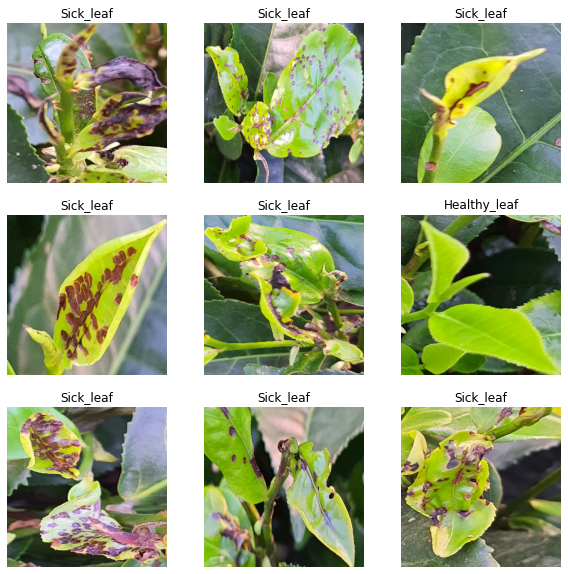

In [56]:
#Displaying the sample images from the dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [57]:
#Creating a Layer for Resizing and Normalization
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

Data Augmentation

In [58]:
#Data Augmentation
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [59]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
batch_input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
chanDim = -1
if K.image_data_format() == "channels_first":
    input_shape = (CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
    batch_input_shape = (BATCH_SIZE, CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
    chanDim = 1

Model Architecture

In [60]:
#CNN with softmax activation layer in last output layer
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=batch_input_shape)

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (16, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (16, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (16, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (16, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (16, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (16, 62, 62, 64)         0         
 2D)                                                  

In [62]:
#Compiling the Model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [63]:
#Trainig the network
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/10
8/8 [==============================] - 16s 2s/step - loss: 0.6964 - accuracy: 0.5310 - val_loss: 0.6893 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 0.6851 - accuracy: 0.5133 - val_loss: 0.6093 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 12s 1s/step - loss: 0.6908 - accuracy: 0.5000 - val_loss: 0.6649 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 10s 1s/step - loss: 0.6881 - accuracy: 0.4602 - val_loss: 0.5668 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 0.6735 - accuracy: 0.5044 - val_loss: 0.6114 - val_accuracy: 0.6250
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 0.6056 - accuracy: 0.7699 - val_loss: 0.4323 - val_accuracy: 0.8750
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 0.4292 - accuracy: 0.8281 - val_loss: 0.3904 - val_accuracy: 0.7500
Epoch 8/10
8/8 [====================

In [64]:
#testing the CNN model
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_ds)
print(f"Test Accuracy: {round(scores[1],4)*100}%")


[INFO] Calculating model accuracy
1/1 [==============================] - 1s 891ms/step - loss: 0.1551 - accuracy: 0.9375
Test Accuracy: 93.75%


In [145]:
#serialize model to JSON
model_json =model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
    # serialize weights to HDF5
model.save_weights("my_model.h5")
print("Saved model to disk")

Saved model to disk


In [148]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("my_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [151]:
#model.save('model_tl')

In [165]:
print(classname)

NameError: name 'classname' is not defined

Plotting the accuracy Graph

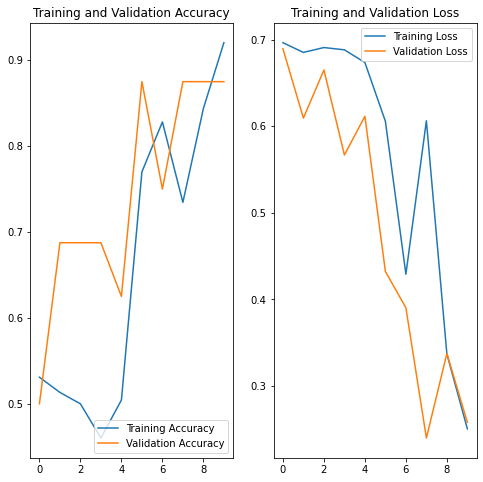

In [152]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [153]:
import os
model.save("TF_Model")

INFO:tensorflow:Assets written to: TF_Model\assets


INFO:tensorflow:Assets written to: TF_Model\assets


In [156]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

first image to predict
actual label: Healthy_leaf
1/1 [==============================] - 1s 606ms/step
predicted label: Healthy_leaf


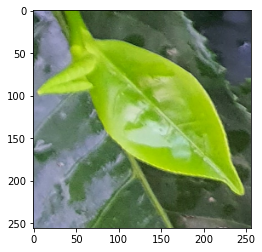

In [157]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

1/1 [==============================] - 0s 45ms/step


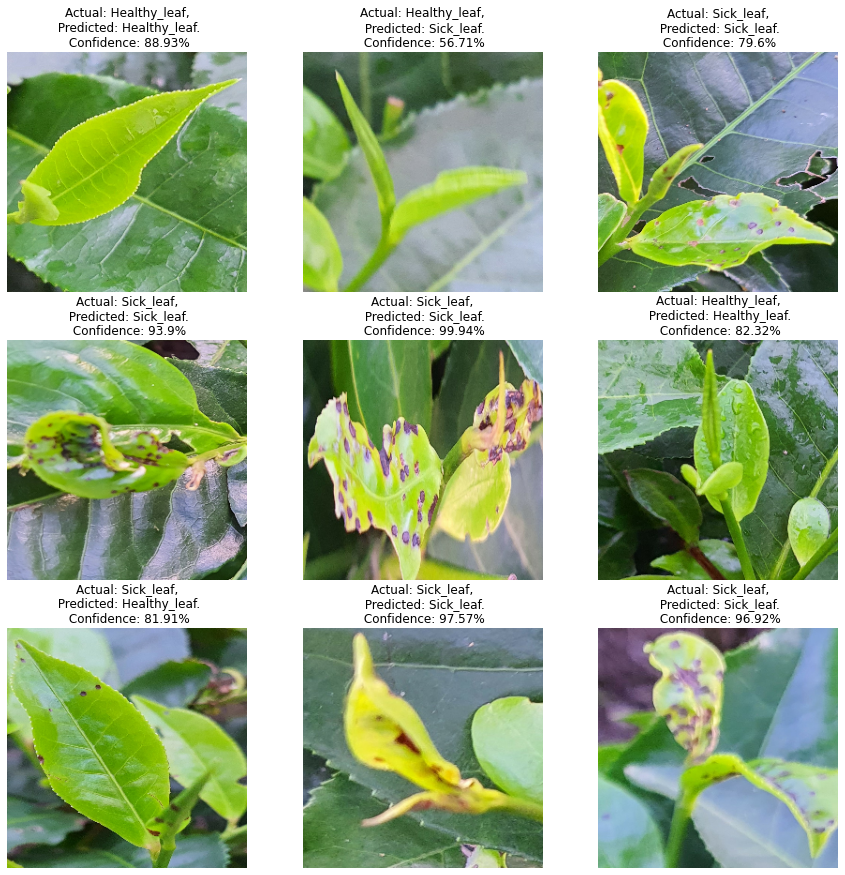

In [158]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        
        actual_class = class_names[labels[i]] 
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [70]:
#Create a Quantization Aware Model
!pip install --upgrade tensorflow-model-optimization
import tensorflow_model_optimization as tfmot

  Using cached tensorflow_model_optimization-0.7.3-py2.py3-none-any.whl (238 kB)
     ---------------------------------------- 90.3/90.3 kB 1.7 MB/s eta 0:00:00


In [160]:
#Quantize only the Dense, MaxPool2D, Conv2D Layers
def apply_quantization(layer):
    if (
        isinstance(layer, layers.Dense)
        or isinstance(layer, layers.MaxPool2D)
        or isinstance(layer, layers.Conv2D)
    ):
        return tfmot.quantization.keras.quantize_annotate_layer(layer)
    return layer

In [72]:
annotated_model = tf.keras.models.clone_model(
    model,
    clone_function=apply_quantization,
)

quant_aware_model = tfmot.quantization.keras.quantize_apply(annotated_model)
quant_aware_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 quant_conv2d (QuantizeWrapp  (None, 254, 254, 32)     963       
 erV2)                                                           
                                                                 
 quant_max_pooling2d (Quanti  (None, 127, 127, 32)     1         
 zeWrapperV2)                                                    
                                                                 
 quant_conv2d_1 (QuantizeWra  (None, 125, 125, 64)     18627     
 pperV2)                                                         
                                                      

In [73]:
#Fine Tuning the model

quant_aware_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [74]:
q_history = quant_aware_model.fit(train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=25,
)

Epoch 1/25
8/8 [==============================] - 16s 1s/step - loss: 0.4412 - accuracy: 0.8203 - val_loss: 0.2577 - val_accuracy: 0.9375
Epoch 2/25
8/8 [==============================] - 12s 1s/step - loss: 0.2687 - accuracy: 0.9558 - val_loss: 0.0857 - val_accuracy: 1.0000
Epoch 3/25
8/8 [==============================] - 12s 1s/step - loss: 0.1929 - accuracy: 0.9292 - val_loss: 0.1610 - val_accuracy: 0.9375
Epoch 4/25
8/8 [==============================] - 9s 1s/step - loss: 0.1651 - accuracy: 0.9469 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 5/25
8/8 [==============================] - 11s 1s/step - loss: 0.1759 - accuracy: 0.9381 - val_loss: 0.2642 - val_accuracy: 0.8750
Epoch 6/25
8/8 [==============================] - 10s 1s/step - loss: 0.3705 - accuracy: 0.8407 - val_loss: 0.3317 - val_accuracy: 1.0000
Epoch 7/25
8/8 [==============================] - 11s 1s/step - loss: 0.2508 - accuracy: 0.9027 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 8/25
8/8 [===================

In [130]:
#Testing the accuracy after Fine tunning 
print("[INFO] Calculating Quant Aware model accuracy")
scores = quant_aware_model.evaluate(test_ds)
print(f"Test Accuracy: {round(scores[1],4)*100}%")

[INFO] Calculating Quant Aware model accuracy
1/1 [==============================] - 3s 3s/step - loss: 0.0150 - accuracy: 1.0000
Test Accuracy: 100.0%


In [127]:
from tensorflow.keras.models import  model_from_json

In [107]:
import json


In [138]:
#serialize model to JSON
model_json =model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
    # serialize weights to HDF5
model.save_weights("my_model.h5")
print("Saved model to disk")
    

Saved model to disk


In [161]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("my_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [162]:
loaded_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [163]:
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [150]:
#saving the fine tunning modeol
import os
model.save("FineTuning")

INFO:tensorflow:Assets written to: FineTuning\assets


INFO:tensorflow:Assets written to: FineTuning\assets


Convert Quanitzation Aware Model to TF Lite Model

In [77]:
converter = tf.lite.TFLiteConverter.from_keras_model(quant_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

quantized_tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Arpana Singh\AppData\Local\Temp\tmp_0zgenfn\assets


INFO:tensorflow:Assets written to: C:\Users\Arpana Singh\AppData\Local\Temp\tmp_0zgenfn\assets
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [78]:
#Testing the Tfmodel


# I tried to convert FINETUNE WEIGHTS into TFLITE  model its take about 3 hour to runned but still running in kaggle.If you want to convert the model.Please move to Google colab Platform 
#No chances in the code to convert tflite model

def evaluate_tflite_model (dataset, interpreter):
    input_index = interpreter.get_input_details()[0]["index"]
    output_index = interpreter.get_output_details()[0]["index"]

    prediction_digits = []
    test_labels = []
    for image, label in dataset.unbatch().take(dataset.unbatch().cardinality()):

        test_image = np.expand_dims(image, axis=0).astype(np.float32)
        interpreter.set_tensor(input_index, test_image)
        interpreter.invoke()
        
        output = interpreter.tensor(output_index)
        digit = np.argmax(output()[0])
        prediction_digits.append(digit)
        test_labels.append(label)

    prediction_digits = np.array(prediction_digits)
    accuracy = (prediction_digits == test_labels).mean()
    return accuracy

interpreter = tf.lite.Interpreter(model_content=quantized_tflite_model)
interpreter.allocate_tensors()

test_accuracy = evaluate_tflite_model(dataset, interpreter)

print('Quant TFLite test_accuracy:', test_accuracy)


Quant TFLite test_accuracy: 0.9862068965517241


In [79]:
import os
model.save("tflite_model.pb")

INFO:tensorflow:Assets written to: tflite_model.pb\assets


INFO:tensorflow:Assets written to: tflite_model.pb\assets


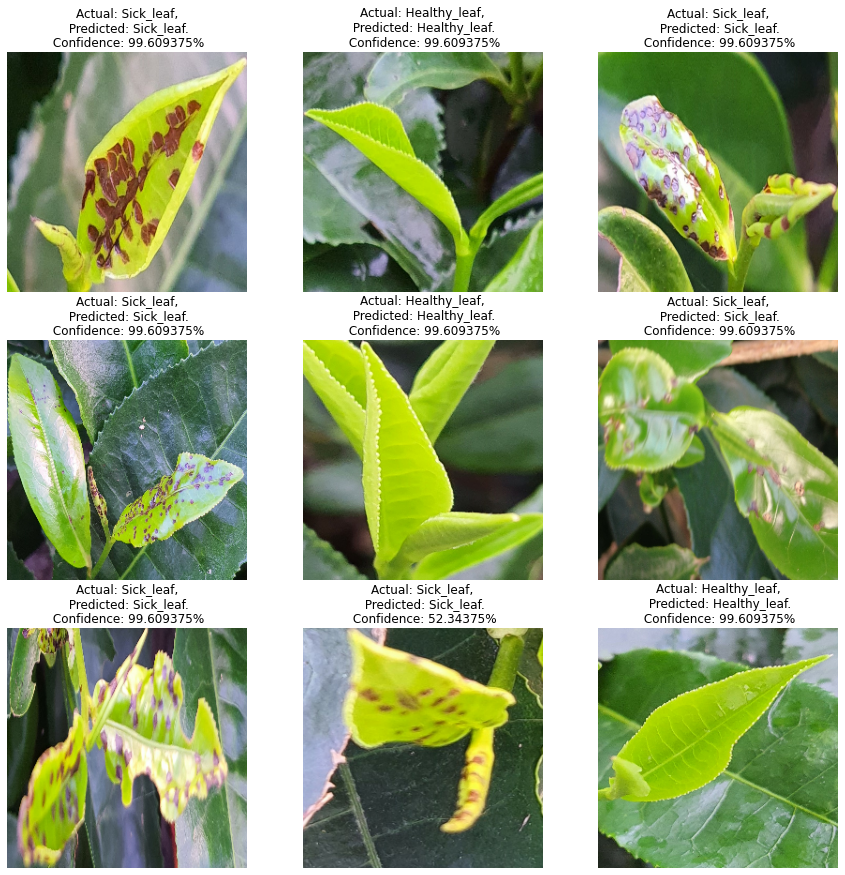

In [80]:
#testing the tflite model 
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))        

        actual_class = class_names[labels[i]]

        test_image = np.expand_dims(images[i], axis=0).astype(np.float32)
        interpreter.set_tensor(input_index, test_image)
        interpreter.invoke()
        output = interpreter.tensor(output_index)
        digit = np.argmax(output()[0])

        predicted_class = class_names[digit]
        confidence = np.max(output()[0])*100

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [93]:
from tensorflow.keras.models import load_model
import keras

In [125]:
# reconstructed_model = keras.models.load_model("saved_model.pb")

In [117]:
Loaded = load_model('model.json')

OSError: Unable to open file (file signature not found)

In [120]:
from keras.models import load_model

first image to predict
actual label: Healthy_leaf


NameError: name 'loaded' is not defined

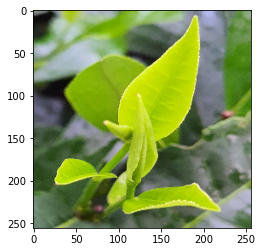

In [121]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = loaded.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])